# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

data = pd.read_csv("../../modulo_7_arvores_1/Tarefa 1/cartao_mau.csv")
data.head(n=2)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [130]:
data['mau'].value_counts()

0    6472
1     298
Name: mau, dtype: int64

In [131]:
y = data['mau']
X = data.drop('mau', axis=1)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

[Text(0.6857590596997754, 0.9807692307692307, 'Unnamed: 0 <= 16470.5\ngini = 0.084\nsamples = 6770\nvalue = [6472, 298]\nclass = aprovados'),
 Text(0.6822938873886678, 0.9423076923076923, 'Unnamed: 0 <= 12384.5\ngini = 0.047\nsamples = 6630\nvalue = [6472, 158]\nclass = aprovados'),
 Text(0.5079093657787163, 0.9038461538461539, 'estado_civil_Widow <= 0.5\ngini = 0.039\nsamples = 5031\nvalue = [4930, 101]\nclass = aprovados'),
 Text(0.3949302397195376, 0.8653846153846154, 'qtd_filhos <= 1.5\ngini = 0.037\nsamples = 4792\nvalue = [4702, 90]\nclass = aprovados'),
 Text(0.32539203145726736, 0.8269230769230769, 'educacao_Lower secondary <= 0.5\ngini = 0.033\nsamples = 4286\nvalue = [4213, 73]\nclass = aprovados'),
 Text(0.24809314004169036, 0.7884615384615384, 'tempo_emprego <= 4.774\ngini = 0.032\nsamples = 4238\nvalue = [4168, 70]\nclass = aprovados'),
 Text(0.20860404992013862, 0.75, 'tempo_emprego <= 4.768\ngini = 0.04\nsamples = 2258\nvalue = [2212, 46]\nclass = aprovados'),
 Text(0.18

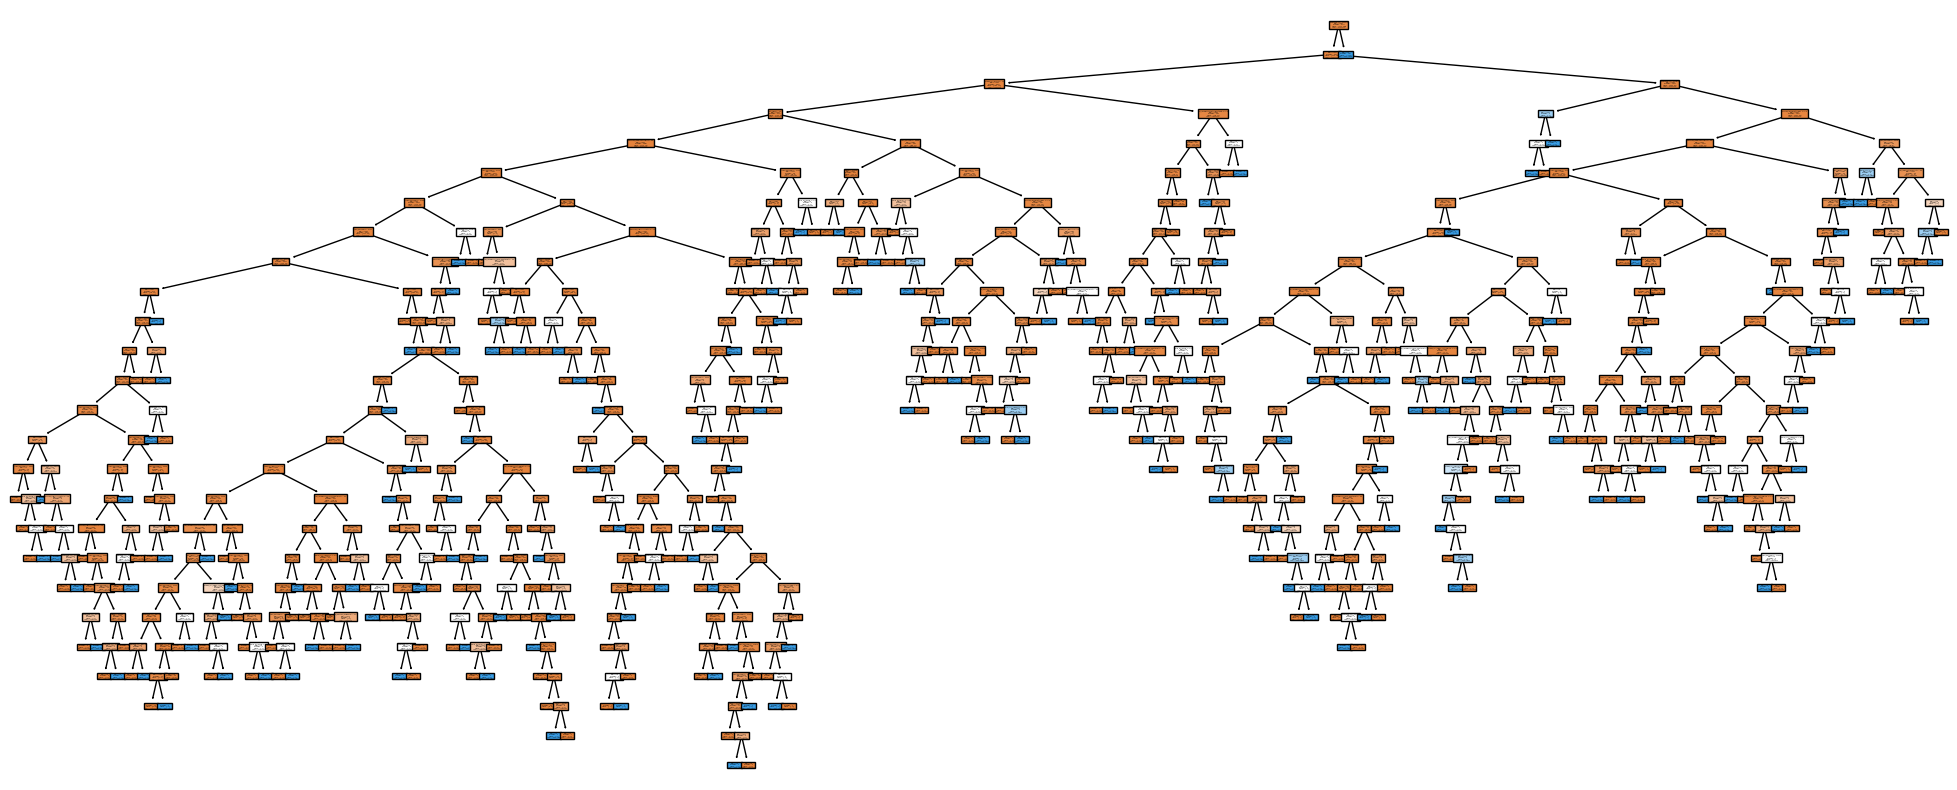

In [132]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt = clf_dt.fit(X, y)

predictions = clf_dt.predict(X)
cm = confusion_matrix(y, predictions, labels=clf_dt.classes_)

plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=["aprovados", "reprovados"],
          feature_names=X.columns)

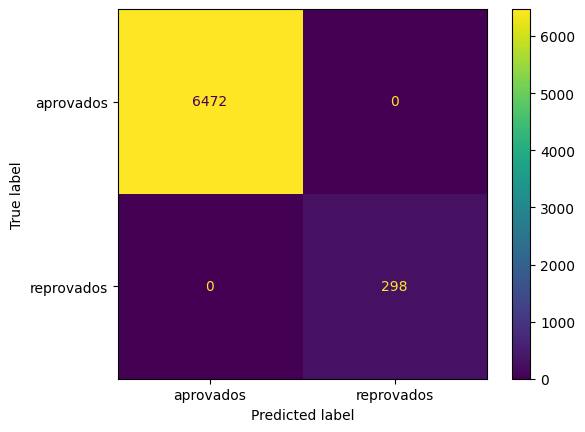

In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [134]:
accuracy_score(y, predictions)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


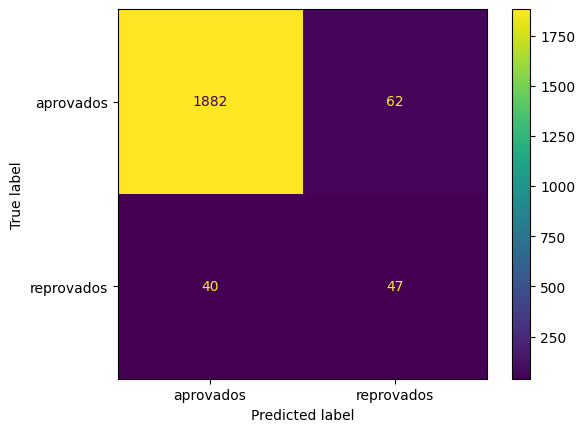

In [136]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt = clf_dt.fit(X_train, y_train)

predictions_test = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions_test, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [137]:
print(f"Acurácia treinamento: {accuracy_score(y, predictions)} \n" +
      f"Acurácia teste: {accuracy_score(y_test, predictions_test)}")

Acurácia treinamento: 1.0 
Acurácia teste: 0.9497784342688331


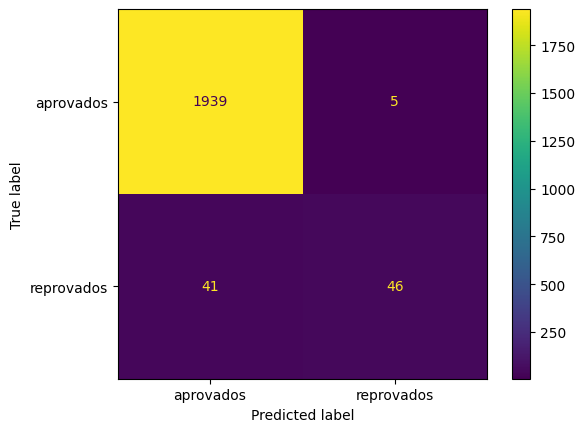

In [138]:
clf_poda = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_poda_dt = clf_poda.fit(X_train, y_train)

predictions_test = clf_poda_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions_test, labels=clf_poda_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot()

In [139]:
predictions_values = pd.Series(predictions_test)
predictions_teste = predictions_values.value_counts()
percentage = (predictions_teste[1] / len(predictions_values)) * 100
print(f"{percentage}% de maus")

2.511078286558346% de maus


In [142]:
data_acc = data

data_acc["mau"] = 0
data_acc["mau"].value_counts()

y = data['mau']
X = data.drop('mau', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf_acc = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_acc = clf_acc.fit(X_train, y_train)

predictions_acc = clf_poda_dt.predict(X_test)
accuracy_score(y_test, predictions_acc)

0.9748892171344166